# Road Safety Data
#### 資料來源
https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

#### EDA 目標
- 事故數量的年趨勢、死亡事故佔比的年趨勢
- 從事故總數量及死亡事故佔比來觀察，哪些維度(原因)可能導致一場事故為死亡事故

#### 觀察維度
- 一週的星期幾
- 一天的哪個時段
- 都市或鄉村
- 駕駛人性別
- 駕駛人年齡區間
- 事故中容易死亡的人是誰(駕駛、乘客、行人)

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## 1. Data Input
- Data range: 2015 - 2019
- Data tables: accidents, casualties, vehicles

In [3]:
accidents = pd.concat([pd.read_csv(f, compression='zip', low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
accidents = accidents.reset_index(drop=True) # reset index
accidents['Accident_Index'] = accidents['Accident_Index'].astype(str)
print('accidents:', accidents.shape)
accidents.head()

accidents: (646830, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,7,03:12,32,E09000010,3,105,6,30.0,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,1,01:30,1,E09000033,3,5,6,30.0,3,4,6,0,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,1,00:30,5,E09000030,3,13,6,30.0,3,4,5,0,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,1,01:11,32,E09000010,3,1010,1,30.0,1,4,4,154,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,1,01:42,4,E09000012,3,107,3,20.0,6,2,3,10,0,5,4,1,2,0,0,1,1,E01001808


In [4]:
casualties = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Casualties*.zip')], sort=True)
casualties['Accident_Index'] = casualties['Accident_Index'].astype(str)
print('casualties:', casualties.shape)
casualties.head()

casualties: (852321, 16)


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,2016010000005,5,23,0,0,1,1,4,1,3,2,0,0,0,1,2
1,2016010000006,7,36,0,0,1,1,10,1,3,9,0,0,0,2,1
2,2016010000008,5,24,0,0,1,1,8,1,3,9,0,0,0,1,1
3,2016010000016,9,59,3,0,2,1,4,1,3,11,0,0,0,2,1
4,2016010000018,6,28,0,0,1,1,6,1,3,1,0,0,0,1,2


In [5]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], sort=True)
vehicles['Accident_Index'] = vehicles['Accident_Index'].astype(str)
print('vehicles:', vehicles.shape)
vehicles.head()

vehicles: (1192061, 23)


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,3,201506E098757,7,45,11,1,-1,1794,0,0,6,8,1,1,0,0,-1,0,0,18,2,9,1
1,4,201506E098766,5,25,1,-1,-1,1582,0,0,6,8,2,2,0,0,-1,0,0,9,1,9,1
2,1,201506E098766,8,51,-1,1,-1,-1,0,0,6,8,-1,1,0,0,-1,0,0,18,2,9,1
3,1,201506E098777,8,50,1,1,-1,4462,0,0,1,0,2,1,0,0,-1,0,0,4,1,20,1
4,4,201506E098780,6,27,-1,1,-1,1598,0,0,6,1,2,1,0,0,-1,0,0,15,1,9,1


## 2. Data Preprocessing

### 2.1. Date & Time

In [6]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

In [7]:
# get year and month
accidents['Year'] = accidents['Date'].dt.year
accidents['Month'] = accidents['Date'].dt.month

In [8]:
# get hour
accidents['Hour'] = accidents['Time'].str[0:2]
accidents['Hour'] = pd.to_numeric(accidents['Hour'])
# accidents = accidents.dropna(subset=['Hour'])
accidents['Hour'] = accidents['Hour'].fillna(-1)
accidents['Hour'] = accidents['Hour'].astype('int')
accidents = accidents.reset_index(drop=True) # reset index

### 2.2. Missing Values

In [9]:
print('% of missing values in accidents:', round(accidents.isna().sum().sum()/len(accidents), 6), '%')

% of missing values in accidents: 0.05757 %


In [10]:
print('% of missing values in casualties:', round(casualties.isna().sum().sum()/len(casualties), 6), '%')

% of missing values in casualties: 0.0 %


In [11]:
print('% of missing values in vehicles:', round(vehicles.isna().sum().sum()/len(vehicles), 6), '%')

% of missing values in vehicles: 0.0 %


## 3. Exploratory Data Analysis (EDA)

### 3.1. 事故總數量的年趨勢、死亡事故佔比的年趨勢
- 2015 - 2019 年事故數量趨勢
- 2015 - 2019 年死亡事故佔比趨勢

In [12]:
acc_year = accidents.groupby(['Year'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Accident_Cnt'}).reset_index()
acc_year_fatal = accidents[accidents['Accident_Severity']==1].groupby(['Year'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Fatal_Cnt'}).reset_index()
acc_year_comb = pd.merge(acc_year, acc_year_fatal, on=['Year'], how='inner')
acc_year_comb['Fatal_Rate'] = round(acc_year_comb['Fatal_Cnt']/acc_year_comb['Accident_Cnt'], 6) * 100

In [13]:
acc_year_comb['Year'] = acc_year_comb['Year'].astype(str)

#### 事故數量 vs 年

In [14]:
acc_year_comb_all = acc_year_comb[['Year', 'Accident_Cnt']].copy().set_index('Year')
acc_year_comb_all

,Accident_Cnt
Year,
2015,140056
2016,136621
2017,129982
2018,122635
2019,117536


[Text(0,0.5,'Total Count\n'), Text(0.5,0,'')]

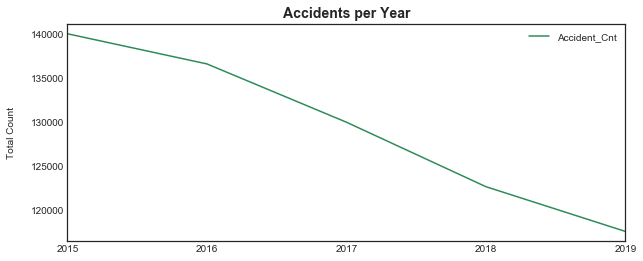

In [15]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 4))

# plot
acc_year_comb_all.plot(label='Accidents per Year', color='seagreen', ax=ax)

ax.set_title('Accidents per Year', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')

#### 死亡事故佔比 vs 年

In [16]:
acc_year_comb_fatal = acc_year_comb[['Year', 'Fatal_Rate']].copy().set_index('Year')
acc_year_comb_fatal

,Fatal_Rate
Year,
2015,1.1538
2016,1.2407
2017,1.2894
2018,1.3626
2019,1.4106


[Text(0,0.5,'Rate (%)\n'), Text(0.5,0,'')]

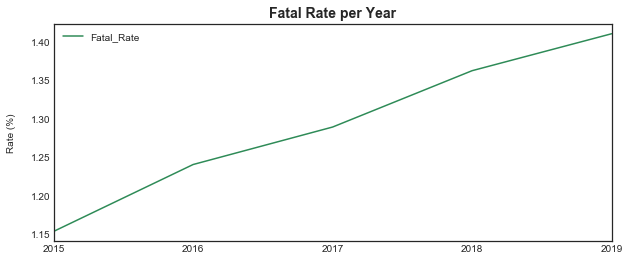

In [17]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 4))

# plot
acc_year_comb_fatal.plot(label='Fatal Rate per Year', color='seagreen', ax=ax)

ax.set_title('Fatal Rate per Year', fontsize=14, fontweight='bold')
ax.set(ylabel='Rate (%)\n', xlabel='')

### 小結
2015 - 2019 年事故數量趨勢變化，及死亡事故佔比趨勢變化？
- 從 2015 年開始，每年事故數量逐年遞減，從 2015 年的 14 萬下降至 2019 年的 12 萬
- 但是其中為死亡事故的佔比卻逐年上升，從 2015 年的 1.15% 上升至 2019 年的 1.41%

### 3.2. 一週的星期幾
- 星期一到星期日，哪一天最常發生事故？
- 星期一到星期日，哪一天最常發生死亡事故？

#### 事故數量 vs 星期

In [35]:
acc_week = accidents.groupby(['Day_of_Week'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Accident_Cnt'}).reset_index()

In [36]:
week_name = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [37]:
acc_week.insert(0, 'Week', '')
acc_week['Week'] = week_name
acc_week = acc_week.drop('Day_of_Week', axis=1)
acc_week = acc_week.set_index('Week')

In [38]:
acc_week.sort_values(by='Accident_Cnt', ascending=False)

,Accident_Cnt
Week,
Friday,105275
Thursday,98854
Wednesday,97730
Tuesday,96565
Monday,91627
Saturday,84784
Sunday,71995


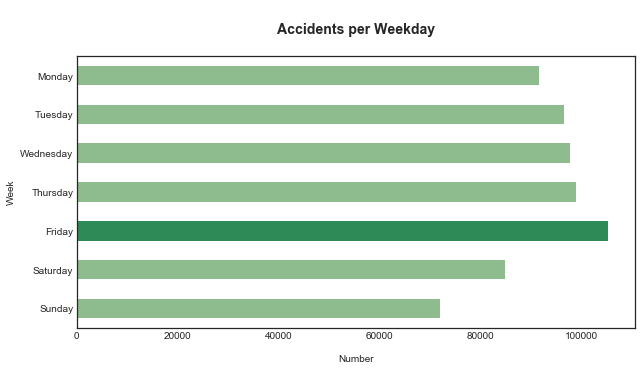

In [39]:
week_name_ordered = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
fig, ax = plt.subplots(figsize=(10,5))
colors=['darkseagreen', 'darkseagreen', 'seagreen', 'darkseagreen', 
        'darkseagreen', 'darkseagreen', 'darkseagreen']
acc_week.reindex(week_name_ordered).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAccidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber', ylabel='Week')
ax.legend('')

#### 每一類事故數量 vs 星期
- 每一類是依據 `Accident_Severity` 欄位，有 fatal, serious, slight 三類

In [40]:
def acc_week_severity(target):
    acc_week_target = accidents[accidents['Accident_Severity']==target].groupby(['Day_of_Week'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Cnt_{}'.format(target)}).reset_index()
    acc_week_target.insert(0, 'Week', '')
    acc_week_target['Week'] = week_name
    acc_week_target = acc_week_target.drop('Day_of_Week', axis=1)
    return acc_week_target

In [41]:
acc_week_fatal = acc_week_severity(1)
acc_week_serious = acc_week_severity(2)
acc_week_slight = acc_week_severity(3)

In [42]:
# merge
acc_week_comb = pd.merge(acc_week, acc_week_fatal, on='Week', how='inner')
acc_week_comb = pd.merge(acc_week_comb, acc_week_serious, on='Week', how='inner')
acc_week_comb = pd.merge(acc_week_comb, acc_week_slight, on='Week', how='inner')

In [43]:
# rate
acc_week_comb['Fatal_Rate'] = round(acc_week_comb['Cnt_1']/acc_week_comb['Accident_Cnt'], 6) * 100
acc_week_comb['Serious_Rate'] = round(acc_week_comb['Cnt_2']/acc_week_comb['Accident_Cnt'], 6) * 100
acc_week_comb['Slight_Rate'] = round(acc_week_comb['Cnt_3']/acc_week_comb['Accident_Cnt'], 6) * 100

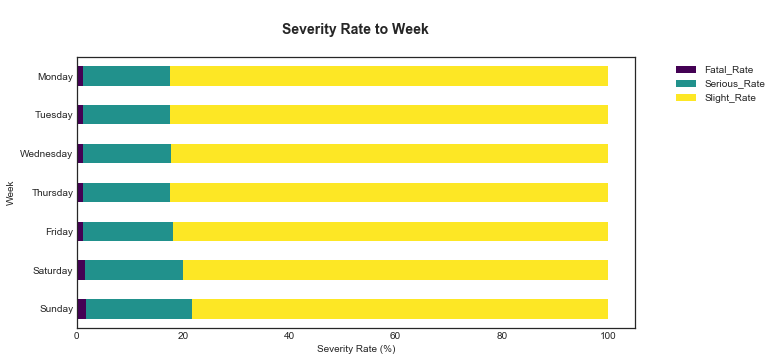

In [46]:
acc_week_rate = acc_week_comb[['Week', 'Fatal_Rate', 'Serious_Rate', 'Slight_Rate']].copy().set_index('Week')
# plot
fig, ax = plt.subplots(figsize=(10,5))
acc_week_rate.reindex(week_name_ordered).plot(kind='barh', ax=ax, stacked=True, cmap='viridis')
ax.set_title('\nSeverity Rate to Week\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Severity Rate (%)', ylabel='Week')
ax.legend(bbox_to_anchor=(1.25, 1), frameon=False)

### 小結
星期一到星期日，哪一天最常發生事故？各事故嚴重性的分布為何？
- 星期一到星期日，星期五的事故數量最多，次之為星期一；而週末的事故數量比平日都來的少，星期日為最少
- 週末的事故數量雖然都比平日少，但是死亡事故的比率卻高出平日許多，週日和週六分別為 1.8% 及 1.6%，其中平日最高者為星期一的 1.2%

### 3.3. 一天的哪個時段
- 一天當中，哪個時段最常發生事故呢？
- 一天當中，哪個時段最常發生死亡事故呢？上下班車流量大的時候嗎？

In [47]:
acc_hour = accidents.groupby(['Hour'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Accident_Cnt'})
acc_hour = acc_hour.drop(index=-1)
acc_hour = acc_hour.reset_index()

In [48]:
acc_hour_fatal = accidents[accidents['Accident_Severity']==1].groupby(['Hour'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Fatal_Cnt'})
acc_hour_fatal = acc_hour_fatal.drop(index=-1)
acc_hour_fatal = acc_hour_fatal.reset_index()

In [49]:
acc_hour_comb = pd.merge(acc_hour, acc_hour_fatal, on='Hour', how='inner')
acc_hour_comb['Fatal_Rate'] = round(acc_hour_comb['Fatal_Cnt']/acc_hour_comb['Accident_Cnt'], 6) * 100
acc_hour_comb = acc_hour_comb.set_index('Hour')
acc_hour_comb =  acc_hour_comb.reindex(index=acc_hour_comb.index[::-1])

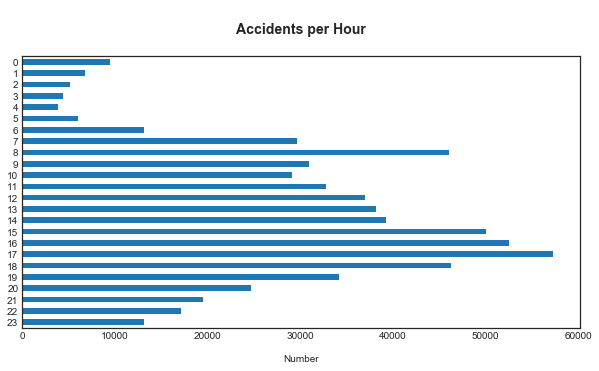

In [50]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
# plot
acc_hour_comb[['Accident_Cnt']].plot(kind='barh', ax=ax)
ax.set_title('\nAccidents per Hour\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber', ylabel='')
ax.legend('')

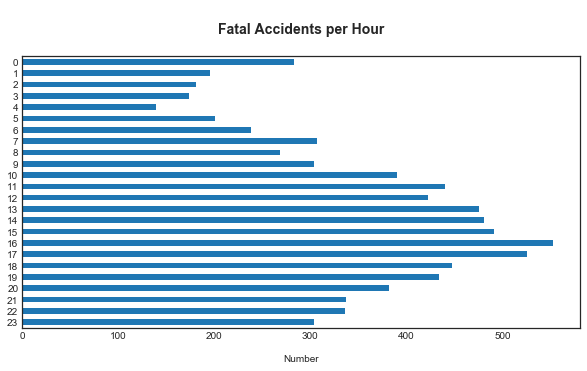

In [51]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
# plot
acc_hour_comb[['Fatal_Cnt']].plot(kind='barh', ax=ax)
ax.set_title('\nFatal Accidents per Hour\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber', ylabel='')
ax.legend('')

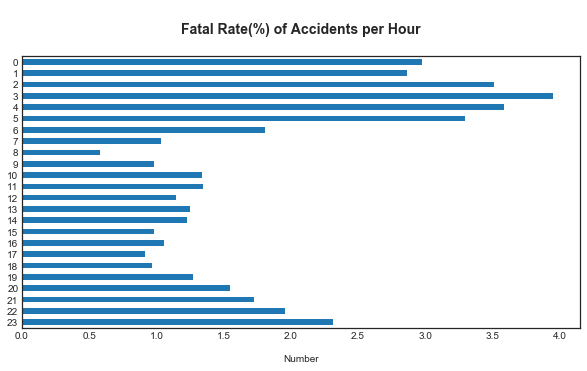

In [52]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
# plot
acc_hour_comb[['Fatal_Rate']].plot(kind='barh', ax=ax)
ax.set_title('\nFatal Rate(%) of Accidents per Hour\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber', ylabel='')
ax.legend('')

### 小結
一天當中，哪個時段最常發生事故？又哪個時段最常發生死亡事故？
- 從事故數量來看，集中在上班的 8 時及下班的 15-18 時；比起上班區間，下班區間較多事故發生，其中以 17 時為最多
- 從死亡事故數量來看，17 時也是最多
- 但是從死亡事故佔比來看，死亡比率最高的時段集中在 0 - 5 時，死亡比率達 3% 以上，其中以 3 時為最高，高達 4%

### 3.4. 都市或鄉村
- 「都市或鄉村」在「平日或週末」上事故的分布
- 「都市或鄉村」在「平日或週末」上死亡事故的分布

In [53]:
df_loc = accidents[['Accident_Index', 'Urban_or_Rural_Area', 'Day_of_Week', 'Accident_Severity']].copy()

In [54]:
# 依照 'Day_of_Week' 欄位，歸類為平日 (weekday) 或週末 (weekend)
df_loc['Weekday_Or_Weekend'] = df_loc['Day_of_Week'].apply(lambda x: 'weekend' if x == 1 or x == 7 else 'weekday')

In [55]:
acc_loc = df_loc.groupby(['Urban_or_Rural_Area', 'Weekday_Or_Weekend'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Accident_Cnt'})
acc_loc = acc_loc.drop(index=[-1, 3])

#### 事故數量分布

In [56]:
loc_summary = acc_loc.unstack().rename(index={1: 'urban', 2: 'rural'})
loc_summary 

Accident_Cnt        
Weekday_Or_Weekend       weekday weekend
Urban_or_Rural_Area                     
urban                     329462  100652
rural                     160510   56105

#### 死亡事故數量分布

In [57]:
acc_loc_fatal = df_loc[df_loc['Accident_Severity']==1].groupby(['Urban_or_Rural_Area', 'Weekday_Or_Weekend'])[['Accident_Index']].count().rename(columns={'Accident_Index': 'Accident_Cnt'})
acc_loc_fatal = acc_loc_fatal.drop(index=[3])

In [58]:
loc_summary_fatal = acc_loc_fatal.unstack().rename(index={1: 'urban', 2: 'rural'})
loc_summary_fatal

Accident_Cnt        
Weekday_Or_Weekend       weekday weekend
Urban_or_Rural_Area                     
urban                       2175     913
rural                       3483    1744

In [59]:
print('urban:', 2175 + 913)
print('rural:', 3483 + 1744)

urban: 3088
rural: 5227


#### 死亡事故的佔比 (%)

In [60]:
loc_summary_rate = round(loc_summary_fatal / loc_summary, 6) * 100
loc_summary_rate

Accident_Cnt        
Weekday_Or_Weekend       weekday weekend
Urban_or_Rural_Area                     
urban                     0.6602  0.9071
rural                     2.1700  3.1085

#### 小結
「都市或鄉村」在「平日或週末」上事故的分布？其中為死亡事故的分布？
- 從事故的總數量來看，都市比鄉村多
- 但是從死亡事故的數量來看，則是鄉村比都市多，多了 2 千多起死亡事故
- 單看都市在「平日或週末」的分布，週末的死亡事故機率比平日高
- 綜合「都市或鄉村」與「平日或週末」的維度來看，週末的鄉村有最高的死亡事故比率，高達 3%

### 3.5. 駕駛人性別
- 性別為男或女的駕駛，誰比較常造成或遇到死亡事故？
- 能不能以這份資料反駁女生不會開車這個刻板印象？

In [61]:
df_acc_veh = pd.merge(accidents, vehicles, on='Accident_Index', how='left')

In [62]:
# sub dataframe
driver = df_acc_veh[['Accident_Index', 'Accident_Severity', 'Vehicle_Type', 'Sex_of_Driver', 'Age_Band_of_Driver']].copy()

In [63]:
driver_gender = driver.groupby(['Sex_of_Driver'])[['Accident_Index']].count().reset_index().rename(columns={'Sex_of_Driver': 'Gender_of_Driver', 'Accident_Index': 'Accident_Cnt'})

In [64]:
def acc_driver_gender(target):
    df_target = driver[driver['Accident_Severity']==target].groupby(['Sex_of_Driver'])[['Accident_Index']].count().reset_index().rename(columns={'Sex_of_Driver': 'Gender_of_Driver', 'Accident_Index': 'Cnt_{}'.format(target)})
    return df_target

In [65]:
driver_gender_fatal = acc_driver_gender(1)
driver_gender_serious = acc_driver_gender(2)
driver_gender_slight = acc_driver_gender(3)

In [66]:
# merge
driver_gender_comb = pd.merge(driver_gender, driver_gender_fatal, on='Gender_of_Driver', how='left')
driver_gender_comb = pd.merge(driver_gender_comb, driver_gender_serious, on='Gender_of_Driver', how='left')
driver_gender_comb = pd.merge(driver_gender_comb, driver_gender_slight, on='Gender_of_Driver', how='left')
driver_gender_comb['Cnt_1'] = driver_gender_comb['Cnt_1'].fillna(0).astype(int)

In [67]:
# rate
driver_gender_comb['Fatal_Rate'] = round(driver_gender_comb['Cnt_1']/driver_gender_comb['Accident_Cnt'], 6) * 100
driver_gender_comb['Serious_Rate'] = round(driver_gender_comb['Cnt_2']/driver_gender_comb['Accident_Cnt'], 6) * 100
driver_gender_comb['Slight_Rate'] = round(driver_gender_comb['Cnt_3']/driver_gender_comb['Accident_Cnt'], 6) * 100

In [68]:
gender_names = ['missing', 'male', 'female', 'unknown']
driver_gender_comb['Gender_of_Driver'] = gender_names

In [69]:
# skip missing
driver_gender_comb = driver_gender_comb[1:]

Text(0.5,1,'\nNumber of Accidents vs Gender of Driver\n')

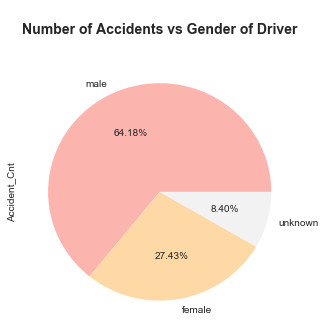

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
driver_gender_comb['Accident_Cnt'].plot(kind='pie', 
                                        ax=ax,
                                        labels = driver_gender_comb['Gender_of_Driver'], 
                                        autopct = '%1.2f%%',
                                        cmap='Pastel1')
ax.set_title('\nNumber of Accidents vs Gender of Driver\n', fontsize=14, fontweight='bold')

In [71]:
driver_gender_comb = driver_gender_comb.rename(columns={'Cnt_1': 'Fatal_Cnt', 'Cnt_2': 'Serious_Cnt', 'Cnt_3': 'Slight_Cnt'})
driver_gender_comb

,Gender_of_Driver,Accident_Cnt,Fatal_Cnt,Serious_Cnt,Slight_Cnt,Fatal_Rate,Serious_Rate,Slight_Rate
1,male,765017,11690,134357,618970,1.5281,17.5626,80.9093
2,female,326905,2597,43707,280601,0.7944,13.3699,85.8356
3,unknown,100072,539,13392,86141,0.5386,13.3824,86.0790


### 小結
性別為男或女的駕駛，誰比較常造成或遇到死亡事故？
- 這份資料中，男生駕駛的人數較多，約為女生駕駛的 2 倍
- 女生駕駛造成或遇到死亡事故的機率較男生駕駛低

### 3.6. 駕駛人年齡區間
- 各年齡層的駕駛，誰最常造成或遇到死亡事故？

In [72]:
driver_age_band = driver.groupby(['Age_Band_of_Driver'])[['Accident_Index']].count().reset_index().rename(columns={'Accident_Index': 'Accident_Cnt'})

In [73]:
def acc_driver_age_band(target):
    df_target = driver[driver['Accident_Severity']==target].groupby(['Age_Band_of_Driver'])[['Accident_Index']].count().reset_index().rename(columns={'Accident_Index': 'Cnt_{}'.format(target)})
    return df_target

In [74]:
driver_age_band_fatal = acc_driver_age_band(1)
driver_age_band_serious = acc_driver_age_band(2)
driver_age_band_slight = acc_driver_age_band(3)

In [75]:
# merge
driver_age_band_comb = pd.merge(driver_age_band, driver_age_band_fatal, on='Age_Band_of_Driver', how='left')
driver_age_band_comb = pd.merge(driver_age_band_comb, driver_age_band_serious, on='Age_Band_of_Driver', how='left')
driver_age_band_comb = pd.merge(driver_age_band_comb, driver_age_band_slight, on='Age_Band_of_Driver', how='left')
driver_age_band_comb['Cnt_1'] = driver_age_band_comb['Cnt_1'].fillna(0).astype(int)
# rate
driver_age_band_comb['Fatal_Rate'] = round(driver_age_band_comb['Cnt_1']/driver_age_band_comb['Accident_Cnt'], 6) * 100
driver_age_band_comb['Serious_Rate'] = round(driver_age_band_comb['Cnt_2']/driver_age_band_comb['Accident_Cnt'], 6) * 100
driver_age_band_comb['Slight_Rate'] = round(driver_age_band_comb['Cnt_3']/driver_age_band_comb['Accident_Cnt'], 6) * 100

In [76]:
age_band_name = ['missing', '0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']
driver_age_band_comb['Age_Band_of_Driver'] = age_band_name
driver_age_band_comb

,Age_Band_of_Driver,Accident_Cnt,Cnt_1,Cnt_2,Cnt_3,Fatal_Rate,Serious_Rate,Slight_Rate
0,missing,145792,677,17013,128102,0.4644,11.6694,87.8663
1,0 - 5,249,2,46,201,0.8032,18.4739,80.7229
2,6 - 10,2045,5,346,1694,0.2445,16.9193,82.8362
3,11 - 15,8389,37,1571,6781,0.4411,18.7269,80.8320
4,16 - 20,81185,872,14319,65994,1.0741,17.6375,81.2884
5,21 - 25,124690,1525,20022,103143,1.2230,16.0574,82.7195
6,26 - 35,251495,2901,38097,210497,1.1535,15.1482,83.6983
7,36 - 45,200642,2370,30825,167447,1.1812,15.3632,83.4556
8,46 - 55,183795,2622,31347,149826,1.4266,17.0554,81.5180
9,56 - 65,107057,1883,20120,85054,1.7589,18.7937,79.4474


In [77]:
# figure
fig_age_band = driver_age_band_comb[['Age_Band_of_Driver', 'Fatal_Rate', 'Serious_Rate', 'Slight_Rate']].copy()
fig_age_band = fig_age_band.set_index('Age_Band_of_Driver')
fig_age_band = fig_age_band[1:].copy()

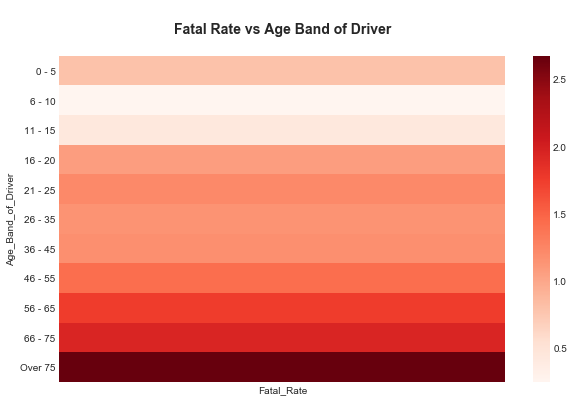

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(fig_age_band.iloc[:, 0:1], cmap='Reds')
plt.title('\nFatal Rate vs Age Band of Driver\n', fontsize=14, fontweight='bold')
plt.show()

### 小結
各年齡層的駕駛，誰最常造成或遇到死亡事故？
- 從 46-55 歲這個年齡區間開始，隨著年齡增加，造成或遇到死亡事故的機率越來越高，超過 75 歲這個年齡區間為最高
- 而 21-25 歲則是 45 歲以下的年齡區間中，造成或遇到死亡事故機率偏高的族群

### 3.7. 事故中容易死亡的人是誰
- 駕駛、乘客、行人哪一類傷者的死亡機率最高？

In [79]:
casualty_class = casualties.groupby('Casualty_Class')
casualty_class = casualty_class.agg({'Accident_Index': 'nunique'})
casualty_class = casualty_class.reset_index().rename(columns={'Accident_Index': 'Accident_Cnt'})

In [80]:
casualty_class_fatal = casualties[casualties['Casualty_Severity']==1].groupby('Casualty_Class')
casualty_class_fatal = casualty_class_fatal.agg({'Accident_Index': 'nunique'})
casualty_class_fatal = casualty_class_fatal.reset_index().rename(columns={'Accident_Index': 'Fatal_Cnt'})

In [81]:
casualty_class_comb = pd.merge(casualty_class, casualty_class_fatal, on='Casualty_Class')
casualty_class_comb['Fatal_Rate'] = round(casualty_class_comb['Fatal_Cnt']/casualty_class_comb['Accident_Cnt'], 6) * 100

In [82]:
casualty_class_comb['Casualty_Class'] = ['Driver or rider', 'Passenger', 'Pedestrian']

In [83]:
casualty_class_comb

,Casualty_Class,Accident_Cnt,Fatal_Cnt,Fatal_Rate
0,Driver or rider,484122,5197,1.0735
1,Passenger,136754,1214,0.8877
2,Pedestrian,111524,2219,1.9897


### 小結
駕駛、乘客、行人哪一類傷者的死亡機率最高？
- 死亡機率最高的類別是行人，約為駕駛或乘客的 2 倍
- 駕駛或乘客的死亡機率差異不大